# RECURRENT NEURAL NETWORK- LONG SHORT TERM MEMORY

In [323]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input


### Data Preperation 

Inspecting the csv and importing

In [264]:
df = pd.read_csv('city_temperature.csv',low_memory=False)
print(df.dtypes)
print(df.head())

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object
   Region  Country State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria   NaN  Algiers      1    1  1995            64.2
1  Africa  Algeria   NaN  Algiers      1    2  1995            49.4
2  Africa  Algeria   NaN  Algiers      1    3  1995            48.8
3  Africa  Algeria   NaN  Algiers      1    4  1995            46.4
4  Africa  Algeria   NaN  Algiers      1    5  1995            47.9


### Check for Null Values

In [265]:
df.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

### Fill NaN values in the 'State' column with 'Unknown'

In [266]:
df['State'] = df['State'].fillna('Unknown')

### Convert 'State' to category data type
Since 'State' is a categorical variable, you can convert it to the 'category' data type to save memory and improve performance.

In [267]:
df['State'] = df['State'].astype('category')
print(df.dtypes)
print(df.head())

Region              object
Country             object
State             category
City                object
Month                int64
Day                  int64
Year                 int64
AvgTemperature     float64
dtype: object
   Region  Country    State     City  Month  Day  Year  AvgTemperature
0  Africa  Algeria  Unknown  Algiers      1    1  1995            64.2
1  Africa  Algeria  Unknown  Algiers      1    2  1995            49.4
2  Africa  Algeria  Unknown  Algiers      1    3  1995            48.8
3  Africa  Algeria  Unknown  Algiers      1    4  1995            46.4
4  Africa  Algeria  Unknown  Algiers      1    5  1995            47.9


### Check for invalid dates

In [268]:
def is_valid_date(year, month, day):
    try:
        date = pd.Timestamp(year=int(year), month=int(month), day=int(day))
        return True
    except ValueError:
        return False
df = df[df.apply(lambda row: is_valid_date(row['Year'], row['Month'], row['Day']), axis=1)]

Create a valid date column

In [269]:
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])
df['DayOfYear'] = df['Date'].dt.dayofyear

In [270]:
df = df.drop(columns=['Year', 'Month', 'Day', 'Date'])

### Feature Engineering

Encode labels

In [271]:
label_encoders = {}
for column in ['Region', 'Country', 'State', 'City']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

Scale/Normalize the data

In [272]:
features = df.drop(columns=['AvgTemperature'])
target = df['AvgTemperature']
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

### Modelling

Split the data into training and testing sets

In [273]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

Reshape input to be [samples, time steps, features]

In [274]:
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

Define the LSTM model using Input layer

In [289]:
model = Sequential()
model.add(Input(shape=(1, X_train.shape[1])))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout to reduce overfitting
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))  # Add dropout to reduce overfitting
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_logarithmic_error')

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)



Fit the model

In [291]:
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=1024, validation_data=(X_test_reshaped, y_test),
          callbacks=[early_stopping], verbose=1)

Epoch 1/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - loss: 0.7798 - val_loss: 0.6518
Epoch 2/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.6585 - val_loss: 0.6476
Epoch 3/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 0.6404 - val_loss: 0.6226
Epoch 4/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.6299 - val_loss: 0.6210
Epoch 5/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 0.6289 - val_loss: 0.6193
Epoch 6/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.6224 - val_loss: 0.6184
Epoch 7/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 32s 14ms/step - loss: 0.6241 - val_loss: 0.6067
Epoch 8/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 0.6033 - val_loss: 0.5833
Epoch 9/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - loss: 0.5891 - val_loss: 0.5784
Epoch 10/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 34s 15ms/step - loss: 0.5878 - val_loss: 0.5737
Epoch 11/50
2271/2271 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - loss: 0.5827 - val_loss: 0.5680
Epoch 12

Make predictions

In [ ]:
predictions = model.predict(X_test_reshaped)

18162/18162 ━━━━━━━━━━━━━━━━━━━━ 24s 1ms/step


In [ ]:
print(predictions)

[[48.477024]
 [61.4689  ]
 [54.702908]
 ...
 [64.1915  ]
 [47.102703]
 [71.63893 ]]


In [300]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 17.116997816285103
Mean Squared Error (MSE): 785.5805674706878
Root Mean Squared Error (RMSE): 28.028210208122243


**Mean Absolute Error (MAE)**:

MAE measures the average absolute difference between the predicted values and the actual values.
It is calculated by taking the mean of the absolute differences between each predicted value and its corresponding actual value.
The MAE value of approximately 17.12 means that, on average, your model's predictions are off by about 17.12 degrees Celsius from the actual temperatures.

**Mean Squared Error (MSE)**:

MSE measures the average of the squares of the errors, i.e., the difference between predicted and actual values.
It is calculated by taking the mean of the squared differences between each predicted value and its corresponding actual value.
MSE puts more emphasis on larger errors compared to MAE because of the squaring.
The MSE value of approximately 785.58 indicates that, on average, the squared difference between the predicted and actual temperatures is about 785.58 square degrees Celsius.

**Root Mean Squared Error (RMSE)**:

RMSE is the square root of the MSE and provides a measure of how spread out the errors are.
It is calculated by taking the square root of the MSE.
RMSE is in the same unit as the predicted values, making it easier to interpret compared to MSE.
The RMSE value of approximately 28.03 means that, on average, the difference between the predicted and actual temperatures is about 28.03 degrees Celsius.

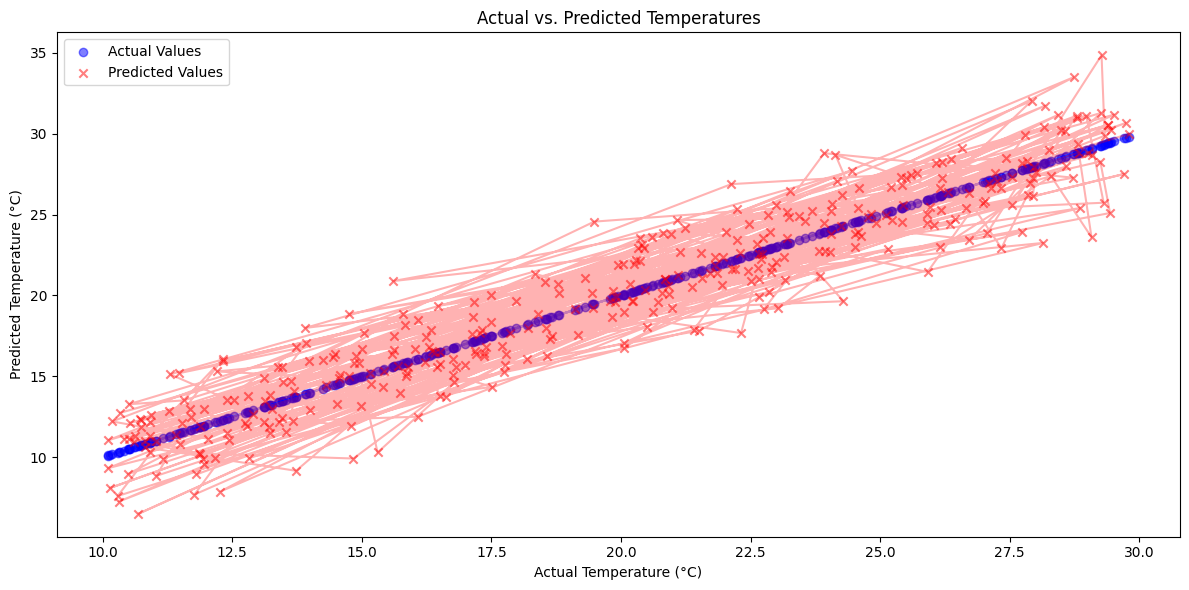

In [315]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual and predicted values
ax.scatter(y_test, y_test, label='Actual Values', color='b', marker='o', alpha=0.5)  # Use y_test as x and y to create a scatter plot
ax.scatter(y_test, predictions, label='Predicted Values', color='r', marker='x', alpha=0.5)

# Add a line plot to show the trend
ax.plot(y_test, y_test, color='b', alpha=0.3)  # Use y_test as x and y to create a line plot
ax.plot(y_test, predictions, color='r', alpha=0.3)

# Set axis labels and title
ax.set_xlabel('Actual Temperature (°C)')
ax.set_ylabel('Predicted Temperature (°C)')
ax.set_title('Actual vs. Predicted Temperatures')

# Add a legend
ax.legend()

# Display the plot
plt.tight_layout()
plt.show()

The plot shows a comparison of actual temperatures (°C) vs. predicted temperatures (°C). The actual temperatures are represented by a blue scatter plot and a blue line. The predicted temperatures are represented by a red scatter plot and a red line.

The x-axis represents the actual temperature (°C). The y-axis represents the predicted temperature (°C).

There is a general upward trend in both the actual and predicted temperatures. However, the predicted temperatures tend to be lower than the actual temperatures, particularly for higher actual temperatures. This is evident by the fact that the red scatter plot is mostly below the blue scatter plot.